In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load Dataset
df = pd.read_csv('instagram_usage_lifestyle.csv')

df.head()


,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [3]:
#Feature Selection
target = 'user_engagement_score'


In [4]:
#Selected Features (Meaningful & Predictive)
features = [
    'age',
    'daily_active_minutes_instagram',
    'sessions_per_day',
    'average_session_length_minutes',
    'reels_watched_per_day',
    'likes_given_per_day',
    'comments_written_per_day',
    'posts_created_per_week',
    'sleep_hours_per_night',
    'exercise_hours_per_week',
    'perceived_stress_score',
    'self_reported_happiness',
    'employment_status',
    'gender'
]


In [5]:
df = df[features + [target]]


In [6]:
#Data Cleaning

# Check missing values
df.isnull().sum()

# Drop missing values
df = df.dropna()


In [7]:
#Encode Categorical Variables

label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['employment_status'] = label_encoder.fit_transform(df['employment_status'])


In [8]:
#Split Features & Target

X = df.drop(columns=[target])
y = df[target]


In [9]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
#Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#Model Prediction
y_pred = model.predict(X_test_scaled)


In [14]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1.5209123207632667
R2 Score: 0.5382459752337654


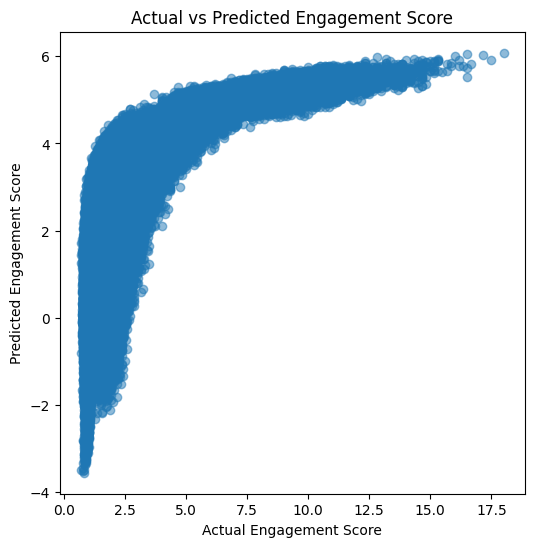

In [15]:
#Actual vs Predicted Visualization

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Engagement Score")
plt.ylabel("Predicted Engagement Score")
plt.title("Actual vs Predicted Engagement Score")
plt.show()


In [16]:
#Feature Importance (Model Interpretation)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
5,likes_given_per_day,0.433642
7,posts_created_per_week,0.284711
6,comments_written_per_day,0.251827
11,self_reported_happiness,0.158642
1,daily_active_minutes_instagram,0.032052
0,age,0.027007
9,exercise_hours_per_week,-0.000200
8,sleep_hours_per_night,-0.000218
13,gender,-0.000900
12,employment_status,-0.001280


Final Conclusion:-

In this task, a regression-based machine learning model
was developed to predict user engagement score using
Instagram usage and lifestyle features.

Feature selection was performed to include meaningful
behavioral and health-related variables.

The model was trained using Linear Regression and
evaluated using Mean Squared Error and R² Score.
Results show that Instagram activity metrics such as
daily active minutes, sessions per day, and reels
consumption strongly influence user engagement.

This demonstrates effective predictive analysis
using machine learning techniques.
